# Feature Scaling:-Feature scaling ensures all features contribute equally by bringing them into a similar range.
1. Standardization
2. Min Max Scaling(Normalization)
3. Unit Vector


# Standardization

In [1]:
import seaborn as sns

In [3]:
df =sns.load_dataset("tips")

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
total_bill = list(df['total_bill'])

<Axes: ylabel='Count'>

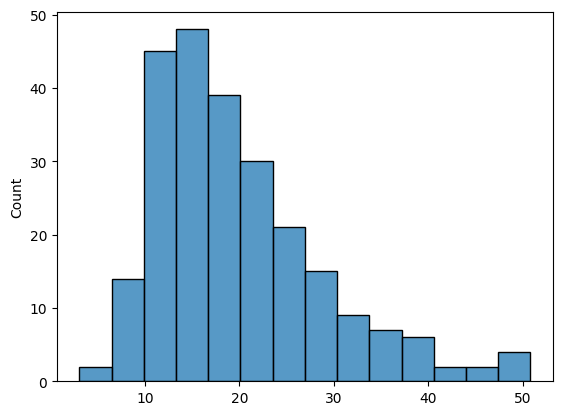

In [10]:
sns.histplot(total_bill)

In [8]:
import numpy as np
mean = np.mean(total_bill)
std = np.std(total_bill)


In [9]:
mean,std

(np.float64(19.78594262295082), np.float64(8.884150577771132))

In [13]:
normalized_data= []
for i in total_bill:
    z_score=(i-mean)/std
    normalized_data.append(z_score)
print(normalized_data)

[np.float64(-0.3147113050904943), np.float64(-1.0632353132988692), np.float64(0.13777989987156145), np.float64(0.43831510316725475), np.float64(0.540744704290506), np.float64(0.6195367051545455), np.float64(-1.2399545152367863), np.float64(0.7985071071171495), np.float64(-0.5342033074974614), np.float64(-0.5634689078183903), np.float64(-1.0711145133852733), np.float64(1.7417599174609364), np.float64(-0.49143050702841123), np.float64(-0.15262490331304146), np.float64(-0.557840907756673), np.float64(0.2019391005751361), np.float64(-1.0643609133112126), np.float64(-0.3935033059545337), np.float64(-0.31696250511518104), np.float64(0.09725829942719795), np.float64(-0.2100305039425557), np.float64(0.05673669898283484), np.float64(-0.45203450659639155), np.float64(2.2100095225958003), np.float64(0.003833498402694168), np.float64(-0.2224121040783337), np.float64(-0.7221785095588127), np.float64(-0.7987193103981653), np.float64(0.21544630072325727), np.float64(-0.015301701807144186), np.float64

<Axes: ylabel='Count'>

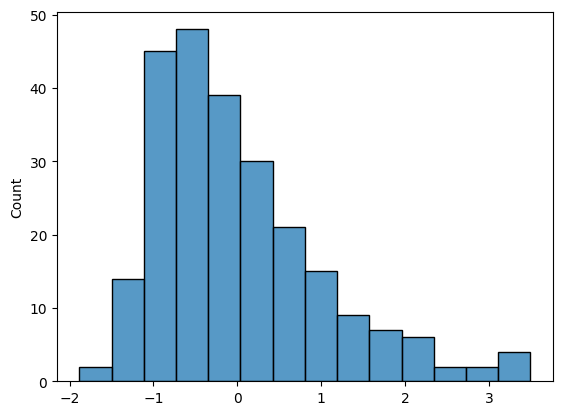

In [14]:
sns.histplot(normalized_data)

to apply z_score individually on every data is time consuming, so we can use a library to do the standardization in quick way

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler

StandardScaler()

In [23]:
scaler.fit(df[['total_bill','tip']]) # compute the mean and std used later in scaling.

StandardScaler()

In [ ]:
scaler.transform(df[['total_bill','tip']])

In [25]:
import pandas as pd

In [27]:
#converting the above scaled dataset into dataframe.
pd.DataFrame(scaler.transform(df[['total_bill','tip']]),columns=['total_bill','tip'])

,total_bill,tip
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


# Min Max Scaling(Normalization)

It scaled the data in the range of 0 to 1.
The formula used for transformation is:-

                                  Xscaled =  (Xi-Xmin)/(Xmax-Xmin) not to remember

In [28]:
import seaborn as sns

In [30]:
df = sns.load_dataset('taxis')

In [31]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max = MinMaxScaler()

In [34]:
min_max.fit(df[['distance','fare','tip']])

MinMaxScaler()

In [35]:
min_max.transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]], shape=(6433, 3))

In [36]:
# If you want to do fit and transform in one line
min_max.fit_transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]], shape=(6433, 3))

In [37]:
#if you have new data then you have to use only transform 
min_max.transform([[1,2,3]])

C:\Users\Pradum Gupta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.02724796, 0.00671141, 0.09036145]])

# Unit Vector Conversion

In [1]:
import seaborn as sns

In [2]:
df=sns.load_dataset('iris')

In [4]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
from sklearn.preprocessing import normalize

In [6]:
normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [10]:
import pandas as pd
df1 = pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [13]:
df1

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281
